## <font color='blue'><u>I. Introduction</u>

<b>About:</b> OSMI Mental Health in Tech Survey 2016<br>
<b>Description:</b> This project leverages the OSMI Mental Health in Tech Survey 2016 dataset to examine the prevalence of mental health challenges and attitudes toward treatment among tech workers. The focus is on identifying barriers to care and opportunities for workplace intervention.<br>
<b>Data Source:</b> https://www.kaggle.com/datasets/osmi/mental-health-in-tech-2016<br>
<b>Target Column(s) for Analysis</b>: Seek Treatment (Binary: Yes/No)
 

#### <strong>A. Client Scenario:
A technology company seeks to enhance employee well-being by identifying individuals at risk of mental health issues. They aim to proactively offer support and resources to those who may benefit, thereby fostering a healthier and more productive work environment.

#### <strong>B. Problem Statement:
Identify and understand the factors influencing the decision to seek or not seek treatment for mental health condition. Understand how to provide appropriate support and reduce stigma associated with mental health in the workplace.

#### <strong>C. Project Objectives:
1. Analyze Influencing Factors: Examine how demographics, work environment, perceived impact of mental illness will affect the likelihood of seeking treatment.
2. Predict Treatment-Seeking Behavior: Develop a predictive model to identify employees who are likely to seek treatment for mental health issues. 
3. Provide Actionable Insights: Offer recommendations to organizations on how to improve mental health support and encourage treatment-seeking behavior among employees.


## <font color='blue'><u>II. Data Preparation and Analysis:</u> <a id=0>

#### <strong>Table of Contents 

1. **[Data Preparation](#10)**  
   - 1.1 [Understanding the data](#1)  
   - 1.2 [Cleaning the data](#2)  
2. **[Data Analysis and Visualization](#20)**  
   - 2.1 [Survey Population Distribution](#3)  
   - 2.2 [Profiling Current Mental Illness Cases by Demographics](#4)  
   - 2.3 [Profiling Workplace Impact as Perceived by Those with Mental Illness](#8)  
   - 2.4 [Profiling Mental Health Treatment Seekers by Key Variables](#9)  
3. **[Classifications](#30)**  
    [Prep data and train test split](#31)  
        
   - 3.1 [Classification Using Logistic Regression - 84%](#5)  
   - 3.2 [Random Forest Classifier - 84%](#6)  
   - 3.3 [Random Forest Classifier - SMOTE - 84%](#7)  
  

## <font color='blue'><u>III. Conclusion and Insights</u> <a id=0>

<u>**Top Predictors of Treatment-Seeking Behavior:**</u>

**1. Personal & Family Mental Health History**<break>

Individuals with past/present mental health conditions or family history of mental illness show strongest treatment-seeking likelihood.

**2. Workplace Impact**<break>
    
Those reporting their condition frequently interferes with work are significantly more likely to seek treatment.

**3. Key Demographic Factors**<break>
- Gender: Males show distinct patterns (context-dependent)
- Employment Type: Self-employed individuals demonstrate unique behavioral trends

## <font color='blue'><u>IV. Recommendation</u> <a id=0>

**Target interventions where employees already signal need (work interference, family history) rather than universal programs. This maximizes ROI and reduces wasted resources.**

1. For Employees with Personal/Family Mental Health History
Recommendations:
- Proactive Outreach Programs: Use anonymous screening tools to identify at-risk employees (e.g., validated mental health assessments).
- Targeted Resource Navigation: Assign dedicated mental health advocates to guide high-risk employees to tailored resources (therapy, genetic counseling, caregiver support).

2. For Employees Reporting Work Interference
Recommendations:
- Productivity-Focused Interventions: 
    - Train managers to recognize signs of work interference (e.g., missed deadlines, withdrawal) using non-stigmatizing language.
    - Offer flexible work accommodations (adjusted hours, reduced workload) without requiring formal diagnosis.
- Real-Time Support Tools:
    - Integrate mental health chatbots (e.g., Woebot) into workflow tools (Slack, Teams) for immediate coping strategies.
- Success Story Campaigns:
    - Share anonymized stories of employees who sought treatment and maintained career growth.
3. For Key Demographic Groups
- Gender-Tailored Support:
    - Launch mental health groups focusing on stress management (not "therapy") and peer mentoring.
    - Collaborate with external initiatives to destigmatize help-seeking.
    - Leadership Modeling: Encourage male executives to share their mental health journeys publicly.   
    
## <font color='blue'>------------------------------------------------------------------------------------------------

### <strong>1. Data Preparation <a id=10></a>                          
[⬆️back to Table of Contents](#0)

#### <font color='blue'>1.1 Understanding the Data:<a id=1></a>
[⬆️back to Table of Contents](#0)
    
<b>Summary of Observations:</b>
- There are <font color='blue'>1433 survey participants [rows]</font> of data and <font color='blue'>63 survey questions [columns]</font><br>
    - Column Names are very long. <font color='red'><i>[candidate for column renaming]</font></i>
    - Not all data in the dataset are relevant for the analyis - <font color='red'><i>[candidate for column removal]</font></i>
- Column Data types: 4=int64, 4=float64, 55=object
    - Int64 columns mostly has a value of 1 or 0; <i><font color='blue'>which represents a boolean value of 1=Yes, 0=No</i></font>
    - Most Object columns has a value Yes/No/Maybe or nulls<font color='red'><i>[candidate for column cleaning]</font></i>
- Explored the data columns:
    - my Target Column: <i>Have you ever sought treatment for a mental health issue from a mental health professional?<i> - has a value of either 1 or 0; <font color='blue'>which represents a boolean value of 1=Yes, 0=No </font>
    - my Feature column(s):     
        - <i>What is your gender? - </i>showed multiple variations of answers [70 unique values] - <i><font color='red'> [candidate for data cleaning]</font></i> - categorized gender into 3 main types (Male, Female, Others)
        - <i>Which of the following best describes your work position?"</i> - showed multiple variations of answers[264 unique values] <i><font color='red'>[candidate for data cleaning]</font></i> group into less than 10 categories
        - <i>What is your age?:</i> min age = 3 and max age = 323 >> <i><font color='red'>[Outlier identified - candidate for data cleaning]</font></i>
        - There are <b>45</b> columns that has NaN <i><font color='red'>[candidate for data cleaning]</font></i>

In [1]:
#import the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.gridspec as gridspec

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
import re
#from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score,classification_report, confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the csv data set into a dataframe
#pd.read_csv('mental-heath-in-tech-2016_20161114.csv')
df = pd.read_csv('mental-heath-in-tech-2016_20161114.csv')

In [3]:
#1: see how many data we have - rows and columns

# Extract shape
total_rows, total_columns = df.shape

# Build a DataFrame
df_summary = pd.DataFrame({
    "Description": ["Total number of rows", "Total number of columns"],
    "Count": [total_rows, total_columns]
})

print("Shape of the Dataset")
pd.DataFrame(df_summary)

Shape of the Dataset


,Description,Count
0,Total number of rows,1433
1,Total number of columns,64


In [4]:
#check the top 5 data rows
df.head(5)

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Unnamed: 62,Do you work remotely?
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,NaN,Sometimes
1,0,Jun-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,NaN,Never
2,0,Jun-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,NaN,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,NaN,Sometimes
4,0,Jun-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,NaN,Sometimes


In [5]:
#check the bottom 5 data rows
df.tail(5)

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Unnamed: 62,Do you work remotely?
1428,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Not applicable to me,34,Female,United States of America,New York,United States of America,New York,Other,NaN,Sometimes
1429,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Often,56,MALE,United States of America,California,Afghanistan,NaN,Support,NaN,Sometimes
1430,0,100-500,1.0,NaN,Yes,Yes,Yes,Yes,I don't know,Somewhat difficult,...,Sometimes,52,Male,United States of America,Georgia,United States of America,Georgia,Back-end Developer,NaN,Sometimes
1431,0,100-500,0.0,1.0,I don't know,I am not sure,No,Yes,I don't know,Somewhat difficult,...,Often,30,Female,United States of America,Nebraska,United States of America,Nebraska,DevOps/SysAdmin,NaN,Sometimes
1432,0,100-500,1.0,NaN,Yes,No,No,No,I don't know,Very difficult,...,Often,25,non-binary,Canada,NaN,Canada,NaN,Other,NaN,Sometimes


In [6]:
#overview of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 64 columns):
 #   Column                                                                                                                                                                            Non-Null Count  Dtype  
---  ------                                                                                                                                                                            --------------  -----  
 0   Are you self-employed?                                                                                                                                                            1433 non-null   int64  
 1   How many employees does your company or organization have?                                                                                                                        1146 non-null   object 
 2   Is your employer primarily a tech company/organization?     

In [7]:
#get the descriptive statistics of the dataset
df.describe()

,Are you self-employed?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you have previous employers?,Have you ever sought treatment for a mental health issue from a mental health professional?,What is your age?,Unnamed: 62
count,1433.000000,1146.000000,263.000000,287.000000,1433.000000,1433.000000,1433.000000,0.0
mean,0.200279,0.770506,0.942966,0.644599,0.882066,0.585485,34.286113,NaN
std,0.400349,0.420691,0.232350,0.479471,0.322643,0.492810,11.290931,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,NaN
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,28.000000,NaN
50%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,33.000000,NaN
75%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,39.000000,NaN
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,323.000000,NaN


In [8]:
#get the summary of datatypes

print("Data Type Distribution")

# Compute counts
dtype_counts = df.dtypes.value_counts().sort_index()

# Convert to DataFrame
df_dtype = (dtype_counts.rename("count").to_frame().reset_index().rename(columns={"index": "dtype"}))
pd.DataFrame(df_dtype)

Data Type Distribution


,dtype,count
0,int64,4
1,float64,4
2,object,56


In [9]:
#check the unique values in each column
dict_count = {}
for i in list(df.columns):
    dict_count[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict_count,index=["unique count"]).transpose().sort_values(by="unique count", ascending=False)

,unique count
Why or why not?,1085
Why or why not?.1,1080
Which of the following best describes your work position?,264
"If yes, what condition(s) have you been diagnosed with?",128
"If so, what condition(s) were you diagnosed with?",116
...,...
Do you have previous employers?,2
Is your primary role within your company related to tech/IT?,2
Is your employer primarily a tech company/organization?,2
Are you self-employed?,2


In [10]:
#explore the values for my feature & target columns
for col in df.columns:
    print(f"Unique values in '{col}': {df[col].unique()}")

Unique values in 'Are you self-employed?': [0 1]
Unique values in 'How many employees does your company or organization have?': ['26-100' 'Jun-25' nan 'More than 1000' '100-500' '500-1000' '1-May']
Unique values in 'Is your employer primarily a tech company/organization?': [ 1. nan  0.]
Unique values in 'Is your primary role within your company related to tech/IT?': [nan  1.  0.]
Unique values in 'Does your employer provide mental health benefits as part of healthcare coverage?': ['Not eligible for coverage / N/A' 'No' nan 'Yes' "I don't know"]
Unique values in 'Do you know the options for mental health care available under your employer-provided coverage?': [nan 'Yes' 'I am not sure' 'No']
Unique values in 'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?': ['No' 'Yes' nan "I don't know"]
Unique values in 'Does your employer offer resources to learn more about mental health concerns and options for s

Unique age values:
[3, 15, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 61, 62, 63, 65, 66, 70, 74, 99, 323]


What is your age?
3      1
15     1
17     1
58     1
62     1
65     1
66     1
70     1
74     1
99     1
323    1
Name: count, dtype: int64

Age Outliers are:  [3, 15, 17, 99, 323]


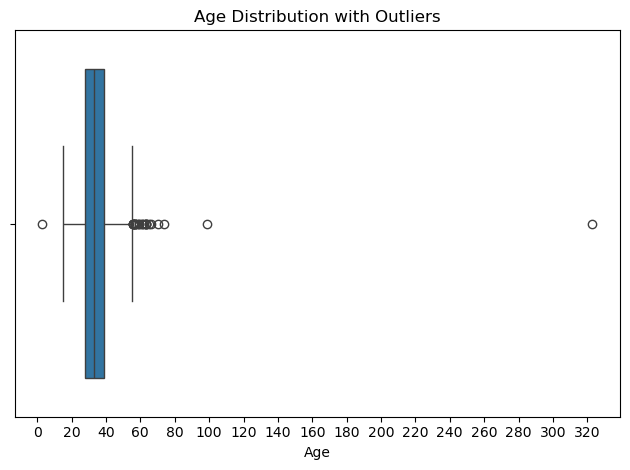

In [11]:
#4 Check Outliers [Age]

print("Unique age values:")
print(sorted(df['What is your age?'].unique()))

#show the ages vs count <=1
age_count = df['What is your age?'].value_counts()
age_filtered_1 = age_count[age_count <=1].sort_index()
display(age_filtered_1)

age_outliers = [3,15,17,99,323]
print('Age Outliers are: ', age_outliers)

sns.boxplot(x=df['What is your age?'])
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(20))
# Customize the plot
plt.title('Age Distribution with Outliers')
plt.xlabel('Age')
plt.tight_layout()
plt.show()

In [12]:
# count how many columns has NaN
column_Nan_count = len(df.columns[df.isna().any()].tolist())
print("Total Number of columns with NaNs: ", column_Nan_count)

# Check many entries have empty values and sort asc with most empty values
# Display the top 10 colums with NaN values.

#pd.set_option('display.width', None) #allows the full column name to be displayed
#Show all columns fully, without truncatio
pd.set_option('display.max_columns', None)        # display all columns
pd.set_option('display.max_colwidth', None)       # show full column text and names
pd.set_option('display.width', None)              # prevent line-wrapping based on width
missing = df.isna().sum()
missing = missing[missing > 0].sort_values(ascending=False)

missing_df = missing.reset_index()
missing_df.columns = ['Column Name', 'Count of NaNs']
display(missing_df)

Total Number of columns with NaNs:  45


,Column Name,Count of NaNs
0,Unnamed: 62,1433
1,"If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?",1289
2,"If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?",1229
3,Is your primary role within your company related to tech/IT?,1170
4,"If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?",1146
5,"If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?",1146
6,"If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?",1146
7,Do you believe your productivity is ever affected by a mental health issue?,1146
8,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,1146
9,Do you know local or online resources to seek help for a mental health disorder?,1146


#### <font color='blue'>1.2 Cleaning the Data<a id=2></a>
[⬆️back to Table of Contents](#0)

<b>Summary of Data Cleaning Performed:</b>
- Select only the <font color='blue'>columns that is necessary</font> out of the 63 available columns and shorten the column names.
- Created a column named <font color='blue'>Gender Category</font> to grouped the data into 3 major categories. 
  NaN values are assigned to Others.
    - Male (1054)
    - Female(342)
    - Others(37)
- Update Outliers
    - <i>What is your age?</i> - <font color='blue'>set outlier to median age of 33</font> Outliers = [3,15,17,99,323]
- Handle NaN/Null Values - replaced it with 'Maybe'
    - <i>Productivity_Impact_on_MentalHealth<i>
    - <i>with_FamilyHist_of_MentalIlness<i>
    - <i>discuss_with_Supervisor</i> 
    - <i>discuss_with_CoWorker</i>
    - <i>Employer_with_MentalHealth_Benefit</i>
- Handle NaN/Null Values - replaced it with 'Not Aware'
    - <i>Employer_with_MentalHealth_Benefit<i>
    - <i>Employer_campaign_MentalWealth?<i>
    - <i>Employer_with_MentalHealth_resource?<i>

In [13]:
#Read only the columns that i will be using for analysis - not all 63 columns are needed 
select_columns = ['Are you self-employed?',
                    'What is your gender?',
                    'What is your age?',
                    'Do you have previous employers?',
                    'Which of the following best describes your work position?',  
                    'Do you have a family history of mental illness?',                  
                    'Have you had a mental health disorder in the past?',
                    'Do you currently have a mental health disorder?',                
                    'If yes, what condition(s) have you been diagnosed with?',
                    'Have you been diagnosed with a mental health condition by a medical professional?',
                    'If so, what condition(s) were you diagnosed with?',   
                    'Have you ever sought treatment for a mental health issue from a mental health professional?',
                    'Does your employer provide mental health benefits as part of healthcare coverage?',
                    #"Do you have medical coverage (private insurance or state-provided) which includes treatment of Â mental health issues?",
                  #"Do you have medical coverage (private insurance or state-provided) which includes treatment of Â mental health issues?",  
                  'Would you feel comfortable discussing a mental health disorder with your coworkers?',
                    'Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?',
                    'Do you feel that your employer takes mental health as seriously as physical health?',
                    'Do you believe your productivity is ever affected by a mental health issue?',
                    'Do you feel that being identified as a person with a mental health issue would hurt your career?',
                    'Do you work remotely?',
                    'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
                    'Does your employer offer resources to learn more about mental health concerns and options for seeking help?',
                    'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
                    'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:',
                    'Do you think that discussing a mental health disorder with your employer would have negative consequences?',
                    'Would you bring up a mental health issue with a potential employer in an interview?',
                    'If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?',
                  'Is your primary role within your company related to tech/IT?'
                 ]
df = pd.read_csv( 'mental-heath-in-tech-2016_20161114.csv',usecols=select_columns)

In [14]:
# Create a new column called "Gender Category" to categorized the gender into 3 main groups

#initially there are are 70 unique gender values]

# Normalize input
s = df['What is your gender?'].astype(str).str.strip().str.lower()

# Build conditions
cond_f = s.str.contains(r'\bfemale\b', na=False)
cond_m = s.str.contains(r'\bmale\b', na=False)

# Assign default or fallback
df['Gender Category'] = df['What is your gender?']  # Default fallback

# Override for Female and Male
df.loc[cond_f, 'Gender Category'] = 'Female'
df.loc[cond_m & ~cond_f, 'Gender Category'] = 'Male'

#use dictionary to do gender mapping for the remaining uncategorized gender values
mapping = {
    'Female': 'Female',
    'F': 'Female',
    'f': 'Female',
    'fm': 'Female',
    'fem': 'Female',
    'Woman': 'Female',
    'woman': 'Female',
    'woman': 'Female',
    'Cis-woman': 'Female',
    'Male': 'Male',
    'male': 'Male',
    'M': 'Male',
    'm': 'Male',
    'Man': 'Male',
    'man': 'Male',
    'mail': 'Male',
    'cis man': 'Male',
    'Other': 'Others'
}

#any gender that is not present in the dictionary will be marked as 'Others'
df['Gender Category'] = (
    df['Gender Category']
      .astype(str)
      .str.strip()
      .map(mapping)
      .fillna('Others')
)

#display what are under the "Others" category to verify that all genders are grouped properly
filtered = df.loc[
    df['Gender Category'] == 'Others',
    ['Gender Category', 'What is your gender?']
]

In [15]:
work_category = {
    "IT Development": ["Back", "Developer", "Front","Designer"],
    "Management": ["Supervisor","Team", "Lead", "Leadership"],
    "DevOps": ["DevOps", "SysAdmin"],
    "One-person shop":["One","person", "shop"],
    "Advocacy": ["Evangelist", "Advocate"],
    "Support": ["Support"],
    "HR": ['HR'],  
    "Sales": ["Sales"],
    "Other": ["Other"]
}

lookup = {keyword.lower(): category for category, kwlist in work_category.items() for keyword in kwlist}
pattern = r"\b(" + "|".join(map(re.escape, lookup.keys())) + r")\b"

# Use str.extract first (vectorized fast pass)
s = df['Which of the following best describes your work position?']

df['Work Position Lower'] = s.astype(str).str.lower()  # convert NaNs to "nan"

df['Work Category'] = (
    df['Work Position Lower']
      .str.extract(pattern, expand=False)  
      # If no capture, this becomes Nat (special pandas missing)
      .map(lookup)  
      # Unmatched values remain as NaN
)

# Fallback for any that extract/map missed
df['Work Category'] = df['Work Category'].fillna(
    df['Work Position Lower'].apply(
      lambda r: next(
        (cat for cat, kwlist in work_category.items()
         if any(kw.lower() in r.split() for kw in kwlist)),
        np.nan
      )
    )
)
df = df.drop(columns=['Work Position Lower'])

In [16]:
#rename the columns & re-arrange the order
df.rename(
    columns={
                    'Are you self-employed?':'self_employed',
                    'What is your gender?': 'gender',
                    'Gender Category':'Gender Category',
                    'What is your age?':'Age',
                    'Do you have previous employers?': 'with_Prev_Employer',
                    'Which of the following best describes your work position?': 'work_position',        
                    'Do you have a family history of mental illness?': 'with_FamilyHist_of_MentalIlness',                  
                    'Have you had a mental health disorder in the past?':'with_Past_MentalIlness',
                    'Do you currently have a mental health disorder?':'with_Current_MentalIlness',                
                    'If yes, what condition(s) have you been diagnosed with?':'Current_diagnosis',
                    'Have you been diagnosed with a mental health condition by a medical professional?':'with_HealthProf_diagnosis?',
                    'If so, what condition(s) were you diagnosed with?':'HealthProf_diagnosis_condition',   
                    'Have you ever sought treatment for a mental health issue from a mental health professional?':'Sought_treatment_HealthProf',
                    'Does your employer provide mental health benefits as part of healthcare coverage?':'Employer_with_MentalHealth_Benefit',
                    #'Do you have medical coverage (private insurance or state-provided) which includes treatment of A mental health issues?':'Employee_withInsurance',
                    'Would you feel comfortable discussing a mental health disorder with your coworkers?':'discuss_with_CoWorker',
                    'Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?':'discuss_with_Supervisor',
                    'Do you feel that your employer takes mental health as seriously as physical health?':'Employer_prioritize_MentalHealth',
                    'Do you believe your productivity is ever affected by a mental health issue?':'Productivity_Impact_on_MentalHealth',
                    'Do you feel that being identified as a person with a mental health issue would hurt your career?':'MentalHealth_careerImpact?',
                    'Do you work remotely?':'Work Remotely?',
                    'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?':'Employer_campaign_MentalWealth?',
                    'Does your employer offer resources to learn more about mental health concerns and options for seeking help?':'Employer_with_MentalHealth_resource?',
                    'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?':'Anonymity_seek_treatment',
                    'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:':'leave',
                    'Do you think that discussing a mental health disorder with your employer would have negative consequences?':'mental_health_consequence',
                    'Would you bring up a mental health issue with a potential employer in an interview?': 'mental_health_interview',
                    'If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?':'work_interfere',
                    'Is your primary role within your company related to tech/IT?':'role_in_tech?'
    },
    inplace=True
)

new_order = ['self_employed','gender','Gender Category','Age','with_Prev_Employer','work_position','with_FamilyHist_of_MentalIlness',
            'with_Past_MentalIlness','with_Current_MentalIlness', 'Current_diagnosis','with_HealthProf_diagnosis?',
            'HealthProf_diagnosis_condition','Sought_treatment_HealthProf','Employer_with_MentalHealth_Benefit',#'Employee_withInsurance'
             'discuss_with_CoWorker','discuss_with_Supervisor','Employer_prioritize_MentalHealth',
             'Productivity_Impact_on_MentalHealth','MentalHealth_careerImpact?',
             'Employer_campaign_MentalWealth?','Employer_with_MentalHealth_resource?','Anonymity_seek_treatment',
             'Work Remotely?', 
             'leave', 'mental_health_consequence', 'mental_health_interview','work_interfere','role_in_tech?'
            ]
df=df[new_order]

In [17]:
#Update outlier data in "What is your age?" column to the median age

median_age = df['Age'].median()
print('The median age is:', median_age)
print('The age outliers that needs updating are:', age_outliers)
df.loc[df['Age'].isin(age_outliers), 'Age'] = median_age

#display the age visual with no more outliers
#data_age = df.loc[~df['Age'].isin(age_outliers)]
#sns.histplot(data=data_age, x="Age")


The median age is: 33.0
The age outliers that needs updating are: [3, 15, 17, 99, 323]


In [18]:
#explore the values for my feature & target columns
for col in df.columns:
    print(f"Unique values in '{col}': {df[col].unique()}")

Unique values in 'self_employed': [0 1]
Unique values in 'gender': ['Male' 'male' 'Male ' 'Female' 'M' 'female' 'm' 'I identify as female.'
 'female ' 'Bigender' 'non-binary' 'Female assigned at birth ' 'F' 'Woman'
 'man' 'fm' 'f' 'Cis female ' 'Transitioned, M2F'
 'Genderfluid (born female)' 'Other/Transfeminine'
 'Female or Multi-Gender Femme' 'Female ' 'woman' 'female/woman'
 'Cis male' 'Male.' 'Androgynous' 'male 9:1 female, roughly' nan
 'Male (cis)' 'Other' 'nb masculine' 'Cisgender Female' 'Man'
 'Sex is male' 'none of your business' 'genderqueer' 'cis male' 'Human'
 'Genderfluid' 'Enby' 'Malr' 'genderqueer woman' 'mtf' 'Queer' 'Agender'
 'Dude' 'Fluid'
 "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? "
 'mail' 'M|' 'Male/genderqueer' 'fem' 'Nonbinary' 'male ' 'human'
 'Female (props for making this a freeform field, though)' ' Female'
 'Unicorn' 'Cis Male' 'Male (trans,

In [19]:
#handle Nan Values & grouped data

#grouped/categorized values
ee_ben_mapping= { "Not eligible for coverage / N/A": 'No', "I don't know": 'Maybe', "No":'No', "Yes":'Yes'}
df['Employer_with_MentalHealth_Benefit'] = (df['Employer_with_MentalHealth_Benefit'].fillna('Maybe').str.strip().replace(ee_ben_mapping))
                                            
ee_cam_mapping= {
    "I don't know": 'Maybe',
    "Some did": 'Maybe',
    "None did":'No',
    "Yes, they all did":'Yes'
}
df['Employer_campaign_MentalWealth?'] = (df['Employer_campaign_MentalWealth?'].fillna('Maybe').str.strip().replace(ee_cam_mapping))

YNI_mapping= {"I don't know": 'Maybe', "No":'No',  "Yes":'Yes'}                                          
df['Employer_with_MentalHealth_resource?'] = (df['Employer_with_MentalHealth_resource?'].fillna('Maybe').str.strip().replace(YNI_mapping))
df['with_FamilyHist_of_MentalIlness'] = (df['with_FamilyHist_of_MentalIlness'].fillna('Maybe').str.strip().replace(YNI_mapping))
df['with_Past_MentalIlness'] = (df['with_Past_MentalIlness'].fillna('Maybe').str.strip().replace(YNI_mapping))


dsup_mapping = {
    'Some of my previous employers': 'Maybe',
    "I don't know": 'Maybe',
    "No, at none of my previous employers":'No',
    "Yes, at all of my previous employers":'Yes'
}

df['discuss_with_Supervisor'] = (    df['discuss_with_Supervisor'].fillna('Maybe').str.strip().replace(dsup_mapping))

csup_mapping = {'Maybe': 'Maybe', "No":'No',"Yes":'Yes'}

df['discuss_with_CoWorker'] = (df['discuss_with_CoWorker'].fillna('Maybe').str.strip().replace(csup_mapping))

careerimpact_mapping = {
    'Maybe': 'Maybe',
    "No, I don't think it would": 'No',
    'No, it has not': 'No',
    'Yes, I think it would': 'Yes',
    'Yes, it has': 'Yes'
}

df['MentalHealth_careerImpact?'] = (df['MentalHealth_careerImpact?'].str.strip().replace(careerimpact_mapping))

productivityimpact_mapping = {
    'Yes': 'Yes',
    'No': 'No',
    'Unsure': 'Maybe',
    'Not applicable to me': 'Maybe'
}

df['Productivity_Impact_on_MentalHealth'] = (df['Productivity_Impact_on_MentalHealth'].fillna('Maybe').str.strip().replace(productivityimpact_mapping))
df['role_in_tech?'] = (df['role_in_tech?'].fillna(0))

priority_mapping = {
    'Yes': 'Yes',
    'No': 'No',
    "I don't know": 'Maybe'    
}
df['Employer_prioritize_MentalHealth'] = (df['Employer_prioritize_MentalHealth'].fillna('Maybe').str.strip().replace(priority_mapping))
df['Anonymity_seek_treatment'] = (df['Anonymity_seek_treatment'].fillna('Maybe').str.strip().replace(priority_mapping))
df['mental_health_consequence'] = (df['mental_health_consequence'].fillna('Maybe').str.strip().replace(priority_mapping))

leave_mapping = {
    'Very easy' : 'Very easy',
    'Somewhat easy':'Somewhat easy',
    'Neither easy nor difficult':'Neither easy nor difficult',
    'Very difficult':'Very difficult',
    'Somewhat difficult':'Somewhat difficult',
    "I don't know"  :'Neither easy nor difficult'
}
df['leave'] = (df['leave'].fillna('Neither easy nor difficult').str.strip().replace(leave_mapping))


### <strong>2. Data Analysis <a id=20></a>                          
[⬆️back to Table of Contents](#0)

#### <font color='blue'>2.1 Survey Population Distribution<a id=3></a>
[⬆️back to Table of Contents](#0)

**Observation:**
Majority of the respondents are **male**, **aged 30-40 years**, and are **employed** in companies. Notably the data also indicates **over half** report current or past mental health issues or have a family history of such conditions. It also highlights **significant gaps in employee awareness** and **availability of mental health resources** across three key areas(mental health campaign, benefit and health resources).  
    
<u>Demographics:</u>
- **Gender:** 73% male (1,000 respondents), 23% female (315 respondents)
- **Age:** Predominantly aged 30–40 years
- **Employment Category:** 80% employed in companies (1,080 respondents)

<u>Mental Health Overview:</u>
- **Current Mental Health Issues:** 62% report current mental health issues; 40% confirmed (575 respondents), 22% uncertain (327 respondents)
- **Past Mental Health Issues:** 68% have experienced mental health issues; 51% confirmed (736 respondents), 17% uncertain (246 respondents)
- **Family History:** 65% have a family history of mental health issues; 46% confirmed (670 respondents), 19% uncertain (275 respondents)

<u>Employee Awareness of mental resources Overview:</u>
- **Employer with MentalHealth Benefit**: 63% say their employer offers no mental health benefits, with 42.3% unaware and 20.7% confirming none.
- **Employer with MentalHealth_resource**: report no mental health resources available, mirroring the same awareness gap.
- **Employer campaign MentalWealth**: 83% indicate no mental wealth campaigns, including 27.2% unaware and 56.7% confirming absence.  

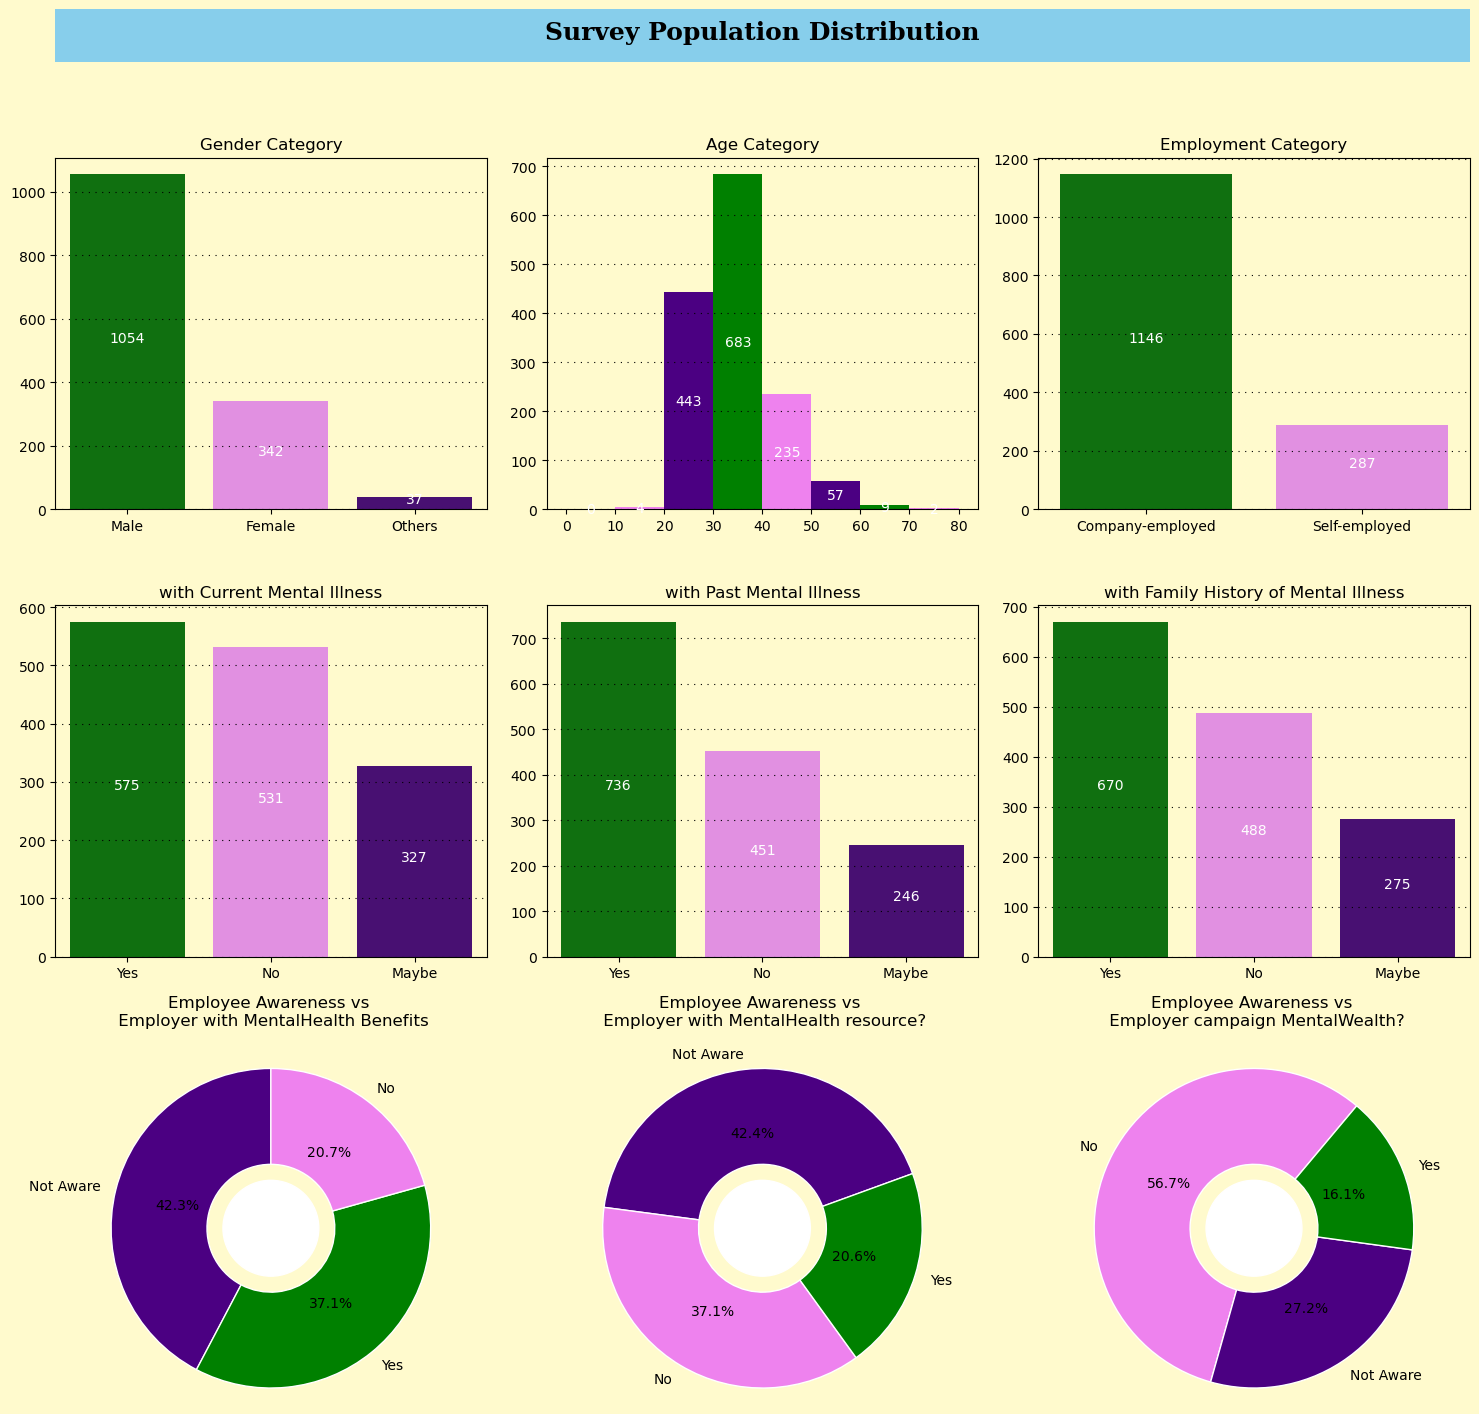

In [20]:
fig = plt.figure(figsize=(15, 15))  # smaller figure to avoid scrollbar
gs = fig.add_gridspec(4, 3, height_ratios=[0.15, 1, 1,1])

axTitle = fig.add_subplot(gs[0, :])
ax0 = fig.add_subplot(gs[1, 0])
ax1 = fig.add_subplot(gs[1, 1])
ax2 = fig.add_subplot(gs[1, 2])
ax3 = fig.add_subplot(gs[2, 0])
ax4 = fig.add_subplot(gs[2, 1])
ax5 = fig.add_subplot(gs[2, 2])
ax6 = fig.add_subplot(gs[3, 0])
ax7 = fig.add_subplot(gs[3, 1])
ax8 = fig.add_subplot(gs[3, 2])

background_color = "lemonchiffon"
color_palette = ["green", "violet", "indigo"]

fig.patch.set_facecolor(background_color)
axTitle.set_facecolor('skyblue')
for ax in [ax0, ax1, ax2, ax3, ax4, ax5]:
    ax.set_facecolor(background_color)

# Title setup
axTitle.spines["bottom"].set_visible(False)
axTitle.spines["left"].set_visible(False)
axTitle.spines["top"].set_visible(False)
axTitle.spines["right"].set_visible(False)
axTitle.tick_params(left=False, bottom=False)
axTitle.set_xticklabels([])
axTitle.set_yticklabels([])
axTitle.text(0.5, 0.8,
             'Survey Population Distribution',
             horizontalalignment='center',
             verticalalignment='top',
             fontsize=18, fontweight='bold',
             fontfamily='serif',
             color="#000000")

# Row 2 plots

# Gender Category countplot
g_order = df['Gender Category'].value_counts().index
ax0.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1, 5))
sns.countplot(ax=ax0, data=df, x='Gender Category', palette=color_palette, order=g_order)
for container in ax0.containers:
    ax0.bar_label(container, fmt='%.0f', padding=3, label_type='center', color='white')
ax0.set_xlabel("")
ax0.set_ylabel("")
ax0.set_title('Gender Category')

# Age histogram
mh_order = df['Age'].value_counts().index
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1, 5))
bin_ages = np.arange(0, df['Age'].max() + 10, 10)
histplot = sns.histplot(ax=ax1, data=df, x='Age', bins=bin_ages, discrete=False, edgecolor='none')
for patch, color in zip(histplot.patches, color_palette * (len(histplot.patches) // len(color_palette) + 1)):
    patch.set_facecolor(color)

#add data labels
for container in ax1.containers:
    ax1.bar_label(container, label_type='center', color = 'white')
ax1.set_xticks(bin_ages)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_title('Age Category')

# Self-employed countplot
sh_order = df['self_employed'].value_counts().index
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1, 5))
sns.countplot(ax=ax2, data=df, x='self_employed', palette=color_palette, order=sh_order)
for container in ax2.containers:
    ax2.bar_label(container, fmt='%.0f', padding=3, label_type='center', color='white')
ax2.set_xticks([0, 1])
ax2.set_xticklabels(['Company-employed', 'Self-employed'])
ax2.set_xlabel("")
ax2.set_ylabel("")
ax2.set_title('Employment Category')

# Row 3 plots

# Current Mental Illness
ih_order = df['with_Current_MentalIlness'].value_counts().index
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1, 5))
sns.countplot(ax=ax3, data=df, x='with_Current_MentalIlness', palette=color_palette, order=ih_order)
for container in ax3.containers:
    ax3.bar_label(container, fmt='%.0f', padding=3, label_type='center', color='white')
ax3.set_xlabel("")
ax3.set_ylabel("")
ax3.set_title('with Current Mental Illness')

# Past Mental Illness
ph_order = df['with_Past_MentalIlness'].value_counts().index
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1, 5))
sns.countplot(ax=ax4, data=df, x='with_Past_MentalIlness', palette=color_palette, order=ph_order)
for container in ax4.containers:
    ax4.bar_label(container, fmt='%.0f', padding=3, label_type='center', color='white')
ax4.set_xlabel("")
ax4.set_ylabel("")
ax4.set_title('with Past Mental Illness')

# Family History of Mental Illness
fh_order = df['with_FamilyHist_of_MentalIlness'].value_counts().index
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1, 5))
sns.countplot(ax=ax5, data=df, x='with_FamilyHist_of_MentalIlness', palette=color_palette, order=fh_order)
for container in ax5.containers:
    ax5.bar_label(container, fmt='%.0f', padding=3, label_type='center', color='white')
ax5.set_xlabel("")
ax5.set_ylabel("")
ax5.set_title('with Family History of Mental Illness')

#row 3 pie_pallette color
pie_color_mapping = {
    'Yes':'green',
    'No':'violet',
    'Not Aware':'indigo'
}

#row3 - col 1
# Employer_with_MentalHealth_Benefit - Doughnut Pie Chart
fh_counts = df['Employer_with_MentalHealth_Benefit'].value_counts()
labels = fh_counts.index.tolist()
sizes = fh_counts.values

# First, replace "Maybe" with "Unknown" in the labels list
labels = ['Not Aware' if x == 'Maybe' else x for x in labels]
pie_colors = [pie_color_mapping[label] for label in labels]

# Create doughnut pie
ax6.pie(sizes, labels=labels, autopct='%.1f%%', startangle=90,
        colors=pie_colors, wedgeprops=dict(width=0.6, edgecolor='w'),
        textprops=dict(color='black'))

# Draw a white circle at the center to create doughnut effect
center_circle = plt.Circle((0,0), 0.3, color='white')
ax6.add_artist(center_circle)

# Equal aspect ratio ensures pie is drawn as circle
ax6.axis('equal')  
ax6.set_title('Employee Awareness vs \n Employer with MentalHealth Benefits', pad=20)

# row3 - col 2
# Employer_with_MentalHealth_resource - Doughnut Pie Chart
rh_counts = df['Employer_with_MentalHealth_resource?'].value_counts()
labelsr = rh_counts.index.tolist()
sizesr = rh_counts.values

# Fix: Use labelsr instead of labels in the list comprehension
labelsr = ['Not Aware' if x == 'Maybe' else x for x in labelsr]  # ← Changed to labelsr
pie_colors = [pie_color_mapping[label] for label in labelsr]

# Create doughnut pie
ax7.pie(sizesr, labels=labelsr, autopct='%.1f%%', startangle=20,
        colors=pie_colors, wedgeprops=dict(width=0.6, edgecolor='w'),
        textprops=dict(color='black'))

# Draw a white circle at the center to create doughnut effect
center_circle = plt.Circle((0,0), 0.3, color='white')
ax7.add_artist(center_circle)

# Equal aspect ratio ensures pie is drawn as circle
ax7.axis('equal')  
ax7.set_title('Employee Awareness vs \n Employer with MentalHealth resource?', pad=20)

# row3 - col 3

# Employer_campaign_MentalWealth? - Doughnut Pie Chart
xh_counts = df['Employer_campaign_MentalWealth?'].value_counts()
labelsx = xh_counts.index.tolist()
sizesx = xh_counts.values

# Fix: Use labelsr instead of labels in the list comprehension
labelsx = ['Not Aware' if x == 'Maybe' else x for x in labelsx]  # ← Changed to labelsr
pie_colors = [pie_color_mapping[label] for label in labelsx]

# Create doughnut pie
ax8.pie(sizesx, labels=labelsx, autopct='%.1f%%', startangle=50,
        colors=pie_colors, wedgeprops=dict(width=0.6, edgecolor='w'),
        textprops=dict(color='black'))

# Draw a white circle at the center to create doughnut effect
center_circle = plt.Circle((0,0), 0.3, color='white')
ax8.add_artist(center_circle)

# Equal aspect ratio ensures pie is drawn as circle
ax8.axis('equal')  
ax8.set_title('Employee Awareness vs \n Employer campaign MentalWealth?', pad=20)

# Adjust layout to prevent overlap and scrollbars
fig.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()


#### <font color='blue'>2.2 Profiling Current Mental Illness Cases by Demographics<a id=4></a>
[⬆️back to Table of Contents](#0)

**Observation:**
     
Overall, the data indicates that **individuals with current mental illness** is **most prevalent among males** , **aged 30-39** , and **company-employed workers** . The "Maybe" category remains substantial across all groups, indicating notable uncertainty or partial acknowledgment of mental health issues.
  
- **Gender:** - Males: 60% affected by mental illness (35% confirmed, 25% uncertain); - Females: 54% affected (40% confirmed, 13% uncertain)
- **Age Group:**  - 30–39 years: 59% affected (420 cases); - 40+ years: Significantly fewer cases
- **Employment Status:**- Company-employed: 59% affected (705 cases; 38% confirmed, 21% uncertain); - Self-employed: 62% affected (197 cases; 39% confirmed, 23% uncertain)

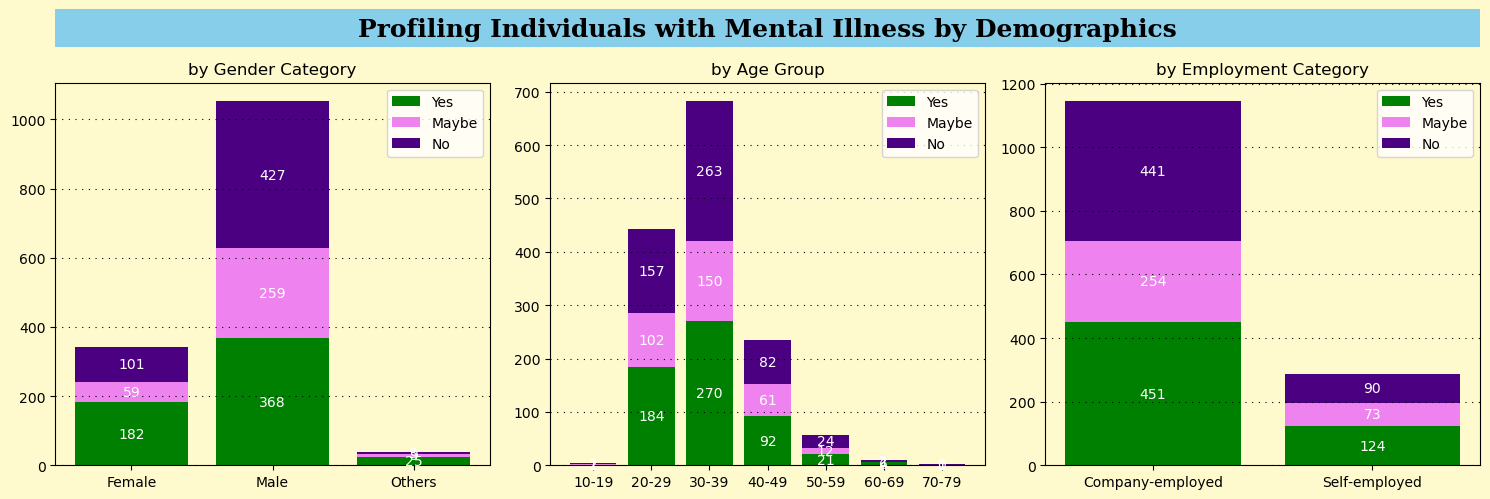

In [21]:
fig = plt.figure(figsize=(15,6))
gs = fig.add_gridspec(2, 3, height_ratios=[0.10, 1] )  # First row smaller

axTitle = fig.add_subplot(gs[0,:])
ax1 = fig.add_subplot(gs[1,0])
ax2 = fig.add_subplot(gs[1,1])
ax3 = fig.add_subplot(gs[1,2])

background_color = "lemonchiffon"
color_palette = ["green","violet","indigo"]
fig.patch.set_facecolor(background_color)
axTitle.set_facecolor('skyblue') 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color)

#Row1
axTitle.spines["bottom"].set_visible(False)
axTitle.spines["left"].set_visible(False)
axTitle.spines["top"].set_visible(False)
axTitle.spines["right"].set_visible(False)
axTitle.tick_params(left=False, bottom=False)
axTitle.set_xticklabels([])
axTitle.set_yticklabels([])
axTitle.text(0.5,0.8,
         'Profiling Individuals with Mental Illness by Demographics',
         horizontalalignment='center',
         verticalalignment='top',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

#Row2 - col1
# Aggregate counts of diagnosed vs gender
counts = pd.crosstab(df['Gender Category'], df['with_Current_MentalIlness'])

bars1 = ax1.bar(counts.index, counts['Yes'], label='Yes', color='green')
bars2 = ax1.bar(counts.index, counts['Maybe'], bottom=counts['Yes'],
                label='Maybe', color='violet')
bars3 = ax1.bar(counts.index, counts['No'], bottom=counts['Yes'] + counts['Maybe'],
                label='No', color='indigo')

# Add labels inside bars
for container in (bars1, bars2, bars3):
    ax1.bar_label(container, fmt='%d', label_type='center', color='white', padding=0)
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax1.set_title('by Gender Category')
ax1.legend(loc='upper right')

#Row2 - col2
# Define bin edges and labels for age groups
bin_edges = np.arange(0, df['Age'].max() + 10, 10)
bin_labels = [f"{i}-{i+9}" for i in bin_edges[:-1]]

# Create AgeGroup column via pd.cut
df['AgeGroup'] = pd.cut(
    df['Age'],
    bins=bin_edges,
    labels=bin_labels,
    include_lowest=True,
    right=False
)

# Crosstab counts per age bin vs mental illness status
counts = pd.crosstab(df['AgeGroup'], df['with_Current_MentalIlness'])

# Ensure columns exist
for col in ['Yes', 'Maybe', 'No']:
    if col not in counts.columns:
        counts[col] = 0
counts = counts[['Yes', 'Maybe', 'No']]

# Plot vertical stacked bar chart
bars1 = ax2.bar(counts.index, counts['Yes'], label='Yes', color='green')
bars2 = ax2.bar(counts.index, counts['Maybe'], bottom=counts['Yes'], label='Maybe', color='violet')
bars3 = ax2.bar(counts.index, counts['No'], bottom=counts['Yes'] + counts['Maybe'], label='No', color='indigo')

# Add labels inside bars
for container in (bars1, bars2, bars3):
    ax2.bar_label(container, fmt='%d', label_type='center', color='white', padding=0)
    ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
    ax2.set_title('by Age Group')
ax2.legend()

#Row2 - col3
# Aggregate counts of diagnosed vs employment Category
counts = pd.crosstab(df['self_employed'], df['with_Current_MentalIlness'])
counts = counts.rename(index={0: 'Company‑employed', 1: 'Self‑employed'})

#Vertical stacked bars
bars1 = ax3.bar(counts.index, counts['Yes'], label='Yes', color='green')
bars2 = ax3.bar(counts.index, counts['Maybe'], bottom=counts['Yes'],label='Maybe', color='violet')
bars3 = ax3.bar(counts.index, counts['No'], bottom=counts['Yes'] + counts['Maybe'],label='No', color='indigo')

# Add labels inside bars
for container in (bars1, bars2, bars3):
    ax3.bar_label(container, fmt='%d', label_type='center', color='white', padding=0)
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax3.set_title('by Employment Category')
ax3.legend(loc='upper right')

# Adjust layout to prevent overlap and scrollbars
fig.tight_layout(rect=[0, 0, 1, .85])

plt.show()


#### <font color='blue'>2.3 Profiling Workplace Impact as Perceived by Those with Mental Illness <a id=8></a>
[⬆️back to Table of Contents](#0)
    
**Observation** 
<break>    
Approximately **half of affected individuals** (46-47%) **perceive clear negative impacts on their career growth and productivity**, while a majority report some degree of interference (63-67%) in their work. Notably, a significant portion remains uncertain about the extent of these effects, **suggesting nuanced or underrecognized workplace struggles**.   
    

Text(0.5, 1.0, 'Interfere with Work')

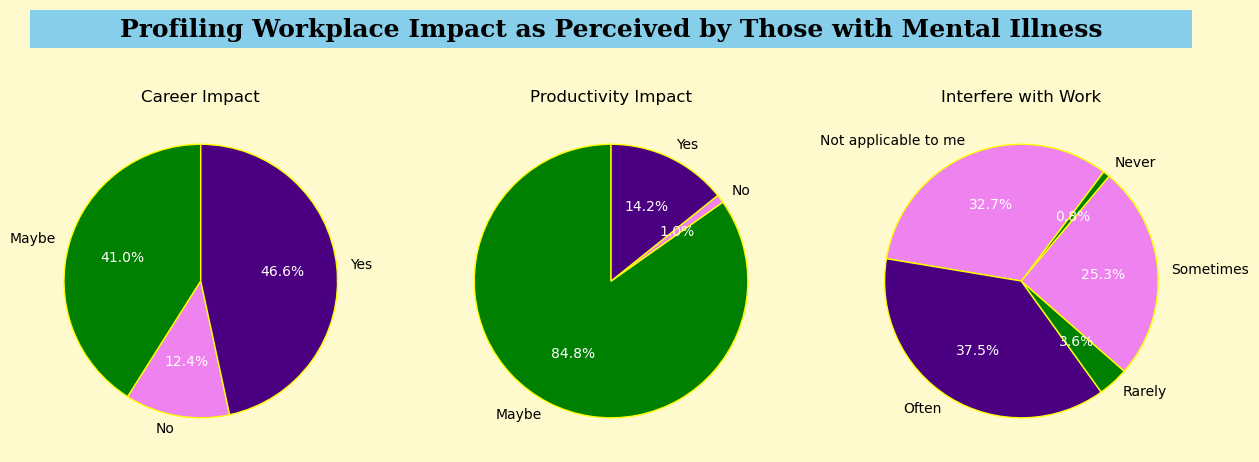

In [22]:
fig = plt.figure(figsize=(15,6))
gs = fig.add_gridspec(2, 3, height_ratios=[0.10, 1] )  # First row smaller

axTitle = fig.add_subplot(gs[0,:])
ax1 = fig.add_subplot(gs[1,0])
ax2 = fig.add_subplot(gs[1,1])
ax3 = fig.add_subplot(gs[1,2])

background_color = "lemonchiffon"
color_palette = ["green","violet","indigo"]
fig.patch.set_facecolor(background_color)
axTitle.set_facecolor('skyblue') 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color)


#Row1
axTitle.spines["bottom"].set_visible(False)
axTitle.spines["left"].set_visible(False)
axTitle.spines["top"].set_visible(False)
axTitle.spines["right"].set_visible(False)
axTitle.tick_params(left=False, bottom=False)
axTitle.set_xticklabels([])
axTitle.set_yticklabels([])
axTitle.text(0.5,0.8,
         'Profiling Workplace Impact as Perceived by Those with Mental Illness',
         horizontalalignment='center',
         verticalalignment='top',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

# Row 2 – col 1 (career impact)
# Chart 1: career impact
countsM = pd.crosstab(df['MentalHealth_careerImpact?'], df['with_Current_MentalIlness'])

sizesM = countsM.sum(axis=1).values
labelsM = countsM.columns.tolist()

wedges, texts, autotexts = ax1.pie(
    sizesM,
    labels=labelsM,
    autopct='%.1f%%',
    startangle=90,
    colors=color_palette,
    wedgeprops=dict(edgecolor='yellow'),
    textprops=dict(color='white')
)

# Set the color of the category labels (outside labels)
for text in texts:
    text.set_color('black')  # Set category label color to black

# Set the color of the percentage labels (inside labels)
for autotext in autotexts:
    autotext.set_color('white')  # Set percentage label color to yellow
    
ax1.set_title('Career Impact')

# Row 2 – col 2 (productivity impact)
countsC = pd.crosstab(df['Productivity_Impact_on_MentalHealth'], df['with_Current_MentalIlness'])
#countsC = countsC[['Maybe', 'No', 'Yes']]

sizesC = countsC.sum(axis=1).values
labelsC = countsC.columns.tolist()

# Create the pie chart and capture the return values
wedges, texts, autotexts = ax2.pie(
    sizesC,
    labels=labelsC,
    autopct='%1.1f%%',
    startangle=90,
    colors=color_palette,
    wedgeprops=dict(edgecolor='yellow'),
    textprops=dict(color='white')  # Set initial label color to white
)

# Set the color of the category labels (outside labels)
for text in texts:
    text.set_color('black')  # Set category label color to black

# Set the color of the percentage labels (inside labels)
for autotext in autotexts:
    autotext.set_color('white')  # Set percentage label color to yellow

ax2.set_title('Productivity Impact')

# Row 3 – col 3 (Work interfere)
countsT = pd.crosstab(df['work_interfere'], df['with_Current_MentalIlness'])

sizesT = countsT.sum(axis=1).values
labelsT = countsT.index.tolist()

# Create the pie chart and capture the return values
wedges, texts, autotexts = ax3.pie(
    sizesT,
    labels=labelsT,
    autopct='%1.1f%%',
    startangle=50,
    colors=color_palette,
    wedgeprops=dict(edgecolor='yellow'),
    textprops=dict(color='white')  # Set initial label color to white
)

# Set the color of the category labels (outside labels)
for text in texts:
    text.set_color('black')  # Set category label color to black

# Set the color of the percentage labels (inside labels)
for autotext in autotexts:
    autotext.set_color('white')  # Set percentage label color to yellow

ax3.set_title('Interfere with Work')

#### <font color='blue'>2.4 Profiling Mental Health Treatment Seekers by Key Variables <a id=9></a>
[⬆️back to Table of Contents](#0)
    
**Observation:**
Mental health treatment-seeking is widespread, with over 50% of individuals across all genders, age groups, and employment categories pursuing help.  

Mental health challenges **significantly affect both careers and productivity for most treatment-seeking individuals**, with a notable proportion remaining undiagnosed or uncertain about their status. Despite high treatment-seeking behavior, a notable portion lack clear diagnoses, highlighting gaps in mental health access and awareness. 
    
<u>Demographics:</u>
- **Gender:** - Over 50% of individuals across all gender categories sought treatment.
- **Age:** - More than half of respondents in every age group sought treatment, with the highest proportion falling within the 30–39 range.
- **Employment Category:** - Treatment-seeking behavior was reported by over 50% of individuals in each employment category.

<u>Impact</u>
- **Career Impact:** - Nearly half (46.6%) of individuals report that their mental health has affected their career, while a substantial portion (41.0%) remain uncertain ("Maybe"). Only 12.4% say their career has not been impacted.
- **Productivity Impact:** The vast majority (99%) acknowledge some level of productivity impact (either "Yes" or "Maybe"), with just 14.2% reporting no effect.

<u>Diagnosis Status</u>
- Among treatment-seeking individuals, 40.1% have a diagnosed mental illness, 37.1% are undiagnosed ("No diagnosis"), and 22.8% fall into an "Unknown" category.
    

Text(0.5, 1.0, 'Treatment-Seeking Individuals \n with Diagnosed Mental Illness')

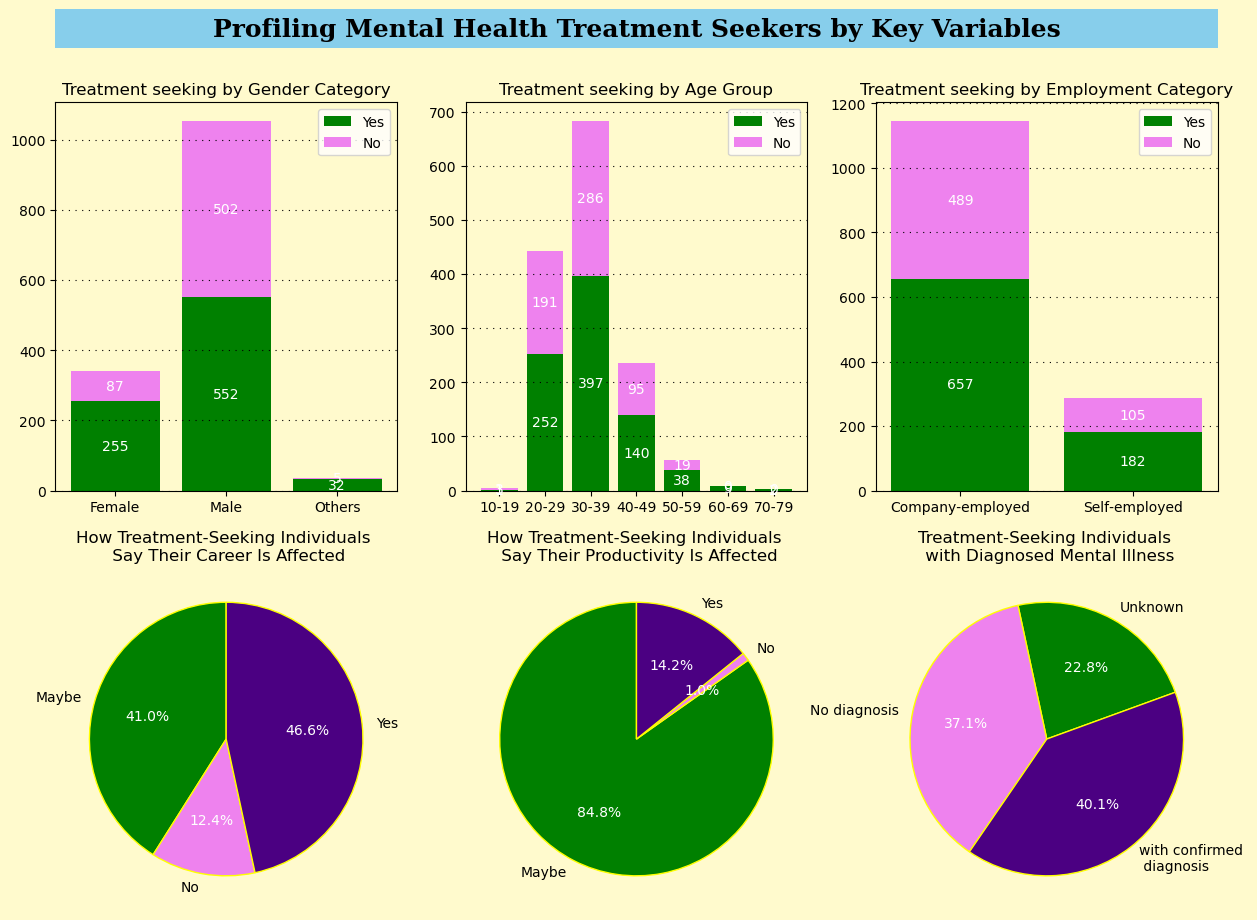

In [23]:
fig = plt.figure(figsize=(15,12))
gs = fig.add_gridspec(3, 3,   height_ratios=[0.10, 1, 1] )  # First row smaller

axTitle = fig.add_subplot(gs[0,:])
ax1 = fig.add_subplot(gs[1,0])
ax2 = fig.add_subplot(gs[1,1])
ax3 = fig.add_subplot(gs[1,2])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[2,2])

background_color = "lemonchiffon"
color_palette = ["green","violet","indigo"]
fig.patch.set_facecolor(background_color)
axTitle.set_facecolor('skyblue') 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color)
ax6.set_facecolor(background_color) 

#Row1
axTitle.spines["bottom"].set_visible(False)
axTitle.spines["left"].set_visible(False)
axTitle.spines["top"].set_visible(False)
axTitle.spines["right"].set_visible(False)
axTitle.tick_params(left=False, bottom=False)
axTitle.set_xticklabels([])
axTitle.set_yticklabels([])
axTitle.text(0.5,0.8,
         'Profiling Mental Health Treatment Seekers by Key Variables',
         horizontalalignment='center',
         verticalalignment='top',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

#Row2 - col1
# Aggregate counts of sought treatment vs gender
counts = pd.crosstab(df['Gender Category'], df['Sought_treatment_HealthProf'])
bars1 = ax1.bar(counts.index, counts[1], label='Yes', color='green')
bars2 = ax1.bar(counts.index, counts[0], bottom=counts[1], label='No', color='violet')

# Add labels inside bars
for container in (bars1, bars2):
    ax1.bar_label(container, fmt='%d', label_type='center', color='white', padding=0)
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax1.set_title('Treatment seeking by Gender Category')
ax1.legend(loc='upper right')

#Row2 - col2
# Define bin edges and labels for age groups
bin_edges = np.arange(0, df['Age'].max() + 10, 10)
bin_labels = [f"{i}-{i+9}" for i in bin_edges[:-1]]

# Create AgeGroup column via pd.cut
df['AgeGroup'] = pd.cut(
    df['Age'],
    bins=bin_edges,
    labels=bin_labels,
    include_lowest=True,
    right=False
)

# Crosstab counts per age bin vs mental illness status
counts = pd.crosstab(df['AgeGroup'], df['Sought_treatment_HealthProf'])

# Plot vertical stacked bar chart
bars1 = ax2.bar(counts.index, counts[1], label='Yes', color='green')
bars2 = ax2.bar(counts.index, counts[0], bottom=counts[1], label='No', color='violet')

# Add labels inside bars
for container in (bars1, bars2):
    ax2.bar_label(container, fmt='%d', label_type='center', color='white', padding=0)
    ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
    ax2.set_title('Treatment seeking by Age Group')
ax2.legend()

#Row2 - col3
# Aggregate counts of diagnosed vs employment Category
counts = pd.crosstab(df['self_employed'], df['Sought_treatment_HealthProf'])
counts = counts.rename(index={0: 'Company‑employed', 1: 'Self‑employed'})

#Vertical stacked bars
bars1 = ax3.bar(counts.index, counts[1], label='Yes', color='green')
bars2 = ax3.bar(counts.index, counts[0], bottom=counts[1], label='No', color='violet')

# Add labels inside bars
for container in (bars1, bars2):
    ax3.bar_label(container, fmt='%d', label_type='center', color='white', padding=0)
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax3.set_title('Treatment seeking by Employment Category')
ax3.legend(loc='upper right')

# Row 3 – col 1 (career impact)
# Chart 1: career impact
countsM = pd.crosstab(df['MentalHealth_careerImpact?'], df['Sought_treatment_HealthProf'])
countsM = countsM.rename(index={0: 'No', 1: 'Yes'})

sizesM = countsM.sum(axis=1).values
labelsM = countsM.index.tolist()

wedges, texts, autotexts = ax4.pie(
    sizesM,
    labels=labelsM,
    autopct='%.1f%%',
    startangle=90,
    colors=color_palette,
    wedgeprops=dict(edgecolor='yellow'),
    textprops=dict(color='white')
)

# Set the color of the category labels (outside labels)
for text in texts:
    text.set_color('black')  # Set category label color to black

# Set the color of the percentage labels (inside labels)
for autotext in autotexts:
    autotext.set_color('white')  # Set percentage label color to yellow
    
ax4.set_title("How Treatment-Seeking Individuals \n Say Their Career Is Affected")

# Row 3 – col 2 (productivity impact)
countsC = pd.crosstab(df['Productivity_Impact_on_MentalHealth'], df['Sought_treatment_HealthProf'])
countsC = countsC.rename(index={0: 'No', 1: 'Yes'})

sizesC = countsC.sum(axis=1).values
labelsC = countsC.index.tolist()

# Create the pie chart and capture the return values
wedges, texts, autotexts = ax5.pie(
    sizesC,
    labels=labelsC,
    autopct='%1.1f%%',
    startangle=90,
    colors=color_palette,
    wedgeprops=dict(edgecolor='yellow'),
    textprops=dict(color='white')  # Set initial label color to white
)

# Set the color of the category labels (outside labels)
for text in texts:
    text.set_color('black')  # Set category label color to black

# Set the color of the percentage labels (inside labels)
for autotext in autotexts:
    autotext.set_color('white')  # Set percentage label color to yellow

ax5.set_title('How Treatment-Seeking Individuals \n Say Their Productivity Is Affected')

# Row 3 – col 3 (Sought_treatment_HealthProf)
countsT = pd.crosstab(df['with_Current_MentalIlness'], df['Sought_treatment_HealthProf'])
countsT = countsT.rename(index={0: 'No', 1: 'Yes', 'Maybe':'Unknown','No':'No diagnosis','Yes':'with confirmed \n diagnosis'})

sizesT = countsT.sum(axis=1).values
labelsT = countsT.index.tolist()

# Create the pie chart and capture the return values
wedges, texts, autotexts = ax6.pie(
    sizesT,
    labels=labelsT,
    autopct='%1.1f%%',
    startangle=20,
    colors=color_palette,
    wedgeprops=dict(edgecolor='yellow'),
    textprops=dict(color='white')  # Set initial label color to white
)

# Set the color of the category labels (outside labels)
for text in texts:
    text.set_color('black')  # Set category label color to black

# Set the color of the percentage labels (inside labels)
for autotext in autotexts:
    autotext.set_color('white')  # Set percentage label color to yellow

ax6.set_title('Treatment-Seeking Individuals \n with Diagnosed Mental Illness')

#### <font color='blue'>2.3 Correlation Matrix<a id=3></a>
[⬆️back to Table of Contents](#0)

<Axes: >

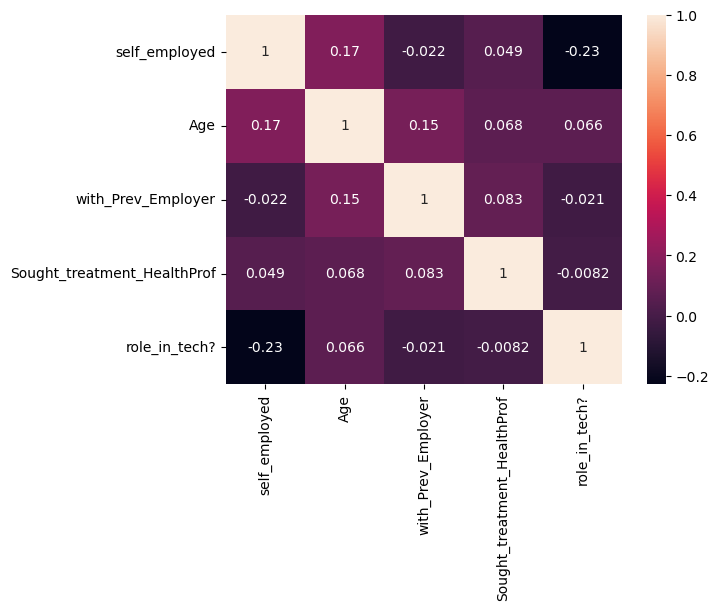

In [24]:
#Correlation Matrix

# 1) Correlation Analysis
sns.heatmap(df.corr(numeric_only = True),annot=True) 

## The correlation plot shows that there is no relationship
# values closer to +1 or -1 imply a strong correlation/relationship
# values closer to 0 imply no relationship/weak relationship


#### <font color='blue'>Data preparation and Train-Test Split for classification<a id=31></a>
[⬆️back to Table of Contents](#0)

In [25]:
#Data prep and Train-Tet Split for classification
from sklearn.preprocessing import LabelEncoder

# Encode categorical features for classification
df_encoded_class = pd.get_dummies(df, columns=['Gender Category', 
                                               'AgeGroup',
                                               'with_Current_MentalIlness',  
                                               'with_Past_MentalIlness',   
                                               'with_FamilyHist_of_MentalIlness',
                                               'MentalHealth_careerImpact?',  
                                               'Productivity_Impact_on_MentalHealth',   
                                               'Employer_campaign_MentalWealth?', 
                                               'Employer_with_MentalHealth_resource?', 
                                               'Employer_with_MentalHealth_Benefit',
                                               'discuss_with_CoWorker', 
                                               'discuss_with_Supervisor',
                                               'mental_health_consequence',
                                               'mental_health_interview',
                                               'work_interfere',
                                               'leave',
                                              'Work Remotely?',
                                              'self_employed',
                                              'role_in_tech?'],
                                               drop_first=True)

X_classification = df_encoded_class[[col for col in df_encoded_class.columns 
                                     if 'Gender Category_' in col 
                                     or 'with_Current_MentalIlness_'  in col 
                                     or 'with_Past_MentalIlness_'  in col                                      
                                     or 'MentalHealth_careerImpact?_' in col 
                                     or 'Productivity_Impact_on_MentalHealth_' in col 
                                     or 'Employer_campaign_MentalWealth?_' in col 
                                     or 'Employer_with_MentalHealth_Benefit_' in col
                                     or 'Employer_with_MentalHealth_resource?_' in col
                                     or 'with_FamilyHist_of_MentalIlness_' in col
                                     or 'Work Remotely?_' in col
                                     or 'self_employed_' in col
                                     or 'leave_' in col
                                     or 'mental_health_consequence' in col
                                     or 'mental_health_interview' in col
                                     or 'work_interfere' in col
                                     or 'role_in_tech?' in col
                                     or 'discuss_with_CoWorker_' in col
                                     or 'discuss_with_Supervisor_' in col
                                     or 'AgeGroup_' in col]]

y_classification = df_encoded_class['Sought_treatment_HealthProf']


# Split the data into training and testing sets for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)


### <strong>3. Classifications <a id=30></a>                          
[⬆️back to Table of Contents](#0)
    
Both the **Logistic Regression model** and the **Random Forest Classifier** achieved approximately 85% accuracy. 
<break>
To exceed 90%, we need more data for further analysis and additional training.
    
**Conclusion:** The model identified personal mental health history (past/current conditions) and family mental health history as the strongest treatment-seeking predictors. Workplace interference emerged as a critical secondary factor, while gender (specifically male identification) and self-employment status showed contextual predictive value."

#### <font color='blue'>3.1 Logistic Regression<a id=5></a>
[⬆️back to Table of Contents](#0)

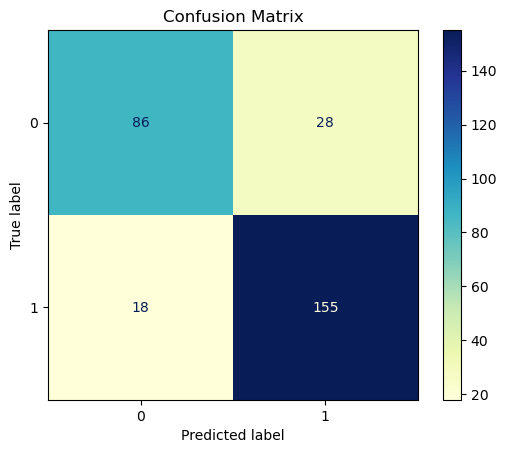

Accuracy of logistic regression for predicting who will seek treatment 0.84
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.75      0.79       114
           1       0.85      0.90      0.87       173

    accuracy                           0.84       287
   macro avg       0.84      0.83      0.83       287
weighted avg       0.84      0.84      0.84       287



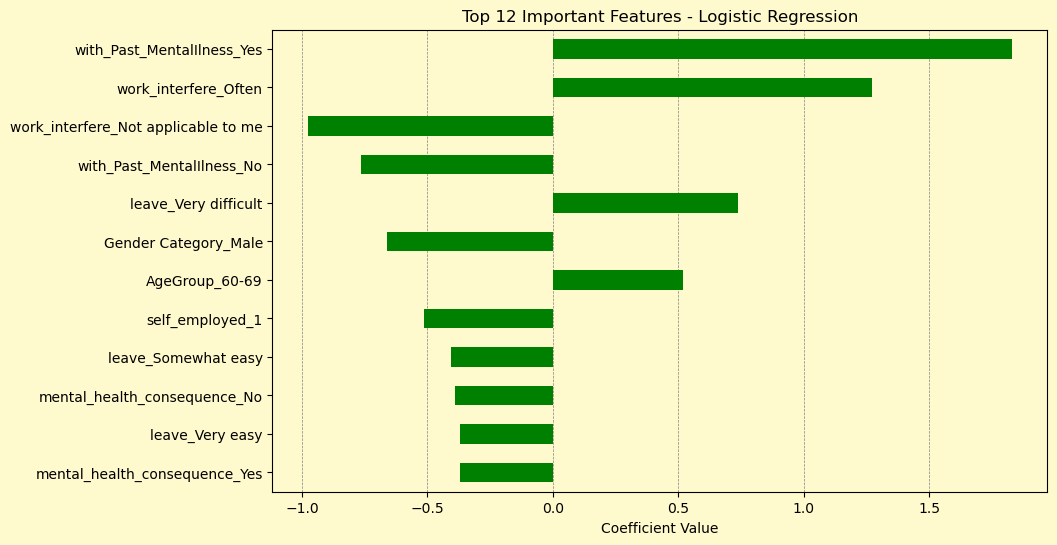

In [26]:
# Train the logistic regression model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_class, y_train_class)

# Predict on the test set
y_log_pred = log_model.predict(X_test_class)

# ---- Confusion Matrix ----
cm = confusion_matrix(y_test_class, y_log_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=log_model.classes_)

disp.plot(cmap=plt.cm.YlGnBu)
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Calculate the accuracy
accuracy = accuracy_score(y_test_class, y_log_pred)
print(f'Accuracy of logistic regression for predicting who will seek treatment {accuracy:.2f}')

# Display the classification report
print("Classification Report:")
print(classification_report(y_test_class, y_log_pred))

# Compute and plot top 12 features
coefficients = pd.Series(log_model.coef_[0], index=X_train_class.columns)
top_12_features = coefficients.abs().nlargest(12).index
top_12_values = coefficients[top_12_features]

# Plotting the coefficients
fig, ax = plt.subplots(figsize=(10, 6), facecolor='lemonchiffon')
ax.set_facecolor('lemonchiffon')

top_12_values.plot(kind='barh', color='green', ax=ax)
ax.set_title('Top 12 Important Features - Logistic Regression')
ax.set_xlabel('Coefficient Value')
ax.invert_yaxis()  # Most important at the top

# Add dashed gridlines behind the bars
ax.set_axisbelow(True)
ax.grid(True, axis='x', color='gray', linestyle='--', linewidth=0.5)

plt.show()

#### <font color='blue'>3.2 Random Forest Classifier<a id=6></a>
[⬆️back to Table of Contents](#0)

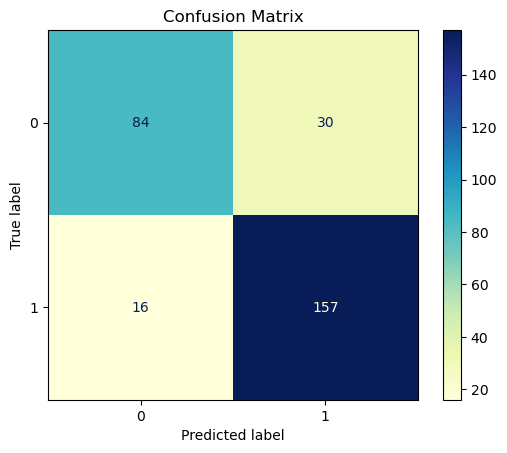

Accuracy of random forest classifier for predicting seeking treatment: 0.84
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.84      0.74      0.79       114
           1       0.84      0.91      0.87       173

    accuracy                           0.84       287
   macro avg       0.84      0.82      0.83       287
weighted avg       0.84      0.84      0.84       287



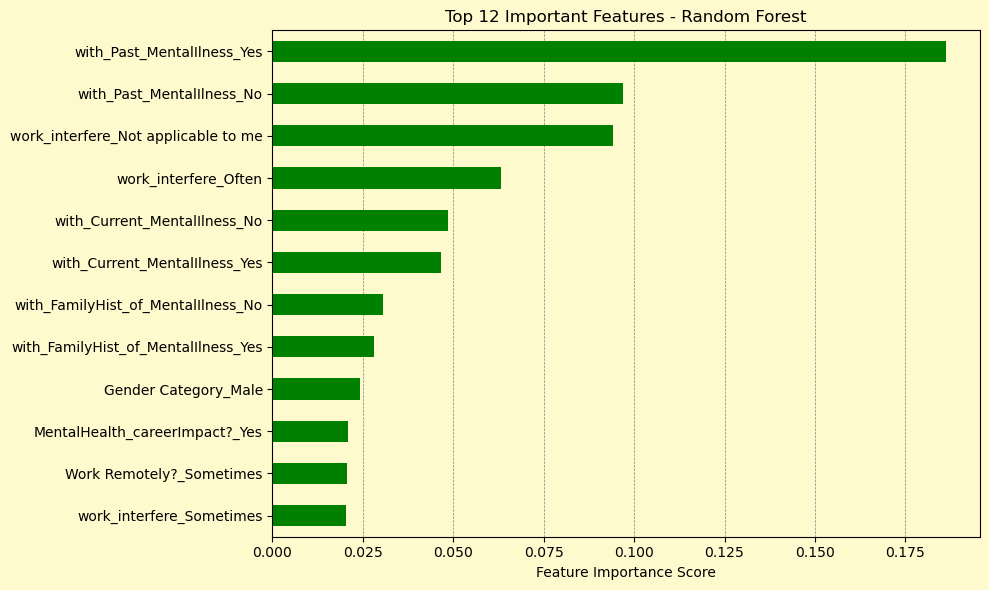

In [27]:
# Train a random forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_class, y_train_class)

# Predict on the test set
y_rf_pred = rf_model.predict(X_test_class)

# ---- Confusion Matrix ----
cm = confusion_matrix(y_test_class, y_rf_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf_model.classes_)

disp.plot(cmap=plt.cm.YlGnBu)
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Calculate the accuracy
accuracy_rf = accuracy_score(y_test_class, y_rf_pred)
print(f'Accuracy of random forest classifier for predicting seeking treatment: {accuracy_rf:.2f}')

# Display the classification report
print("Classification Report for Random Forest:")
print(classification_report(y_test_class, y_rf_pred))

# Plot Top 10 Feature Importances
importances = pd.Series(rf_model.feature_importances_, index=X_train_class.columns)
top_10_features = importances.nlargest(12)

# Create figure and axes with background color
fig, ax = plt.subplots(figsize=(10, 6), facecolor='lemonchiffon')
ax.set_facecolor('lemonchiffon')  # Set axes background too

top_10_features.plot(kind='barh', color='green', ax=ax)
ax.set_title('Top 12 Important Features - Random Forest')
ax.set_xlabel('Feature Importance Score')
ax.invert_yaxis()  # Put most important on top

# Add dashed gridlines behind the bars
ax.set_axisbelow(True)
ax.grid(True, axis='x', color='gray', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

#### <font color='blue'>3.3 Random Forest Classifier with SMOTE<a id=7></a>
[⬆️back to Table of Contents](#0)    

Fitting 5 folds for each of 48 candidates, totalling 240 fits


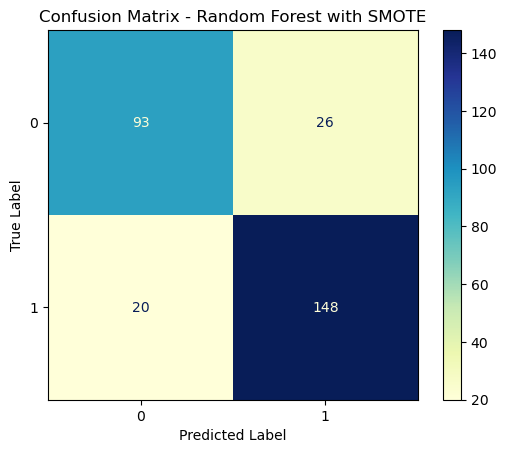

 Accuracy of random forest classifier - SMOTE for predicting seeking treatment: 0.84
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       119
           1       0.85      0.88      0.87       168

    accuracy                           0.84       287
   macro avg       0.84      0.83      0.83       287
weighted avg       0.84      0.84      0.84       287



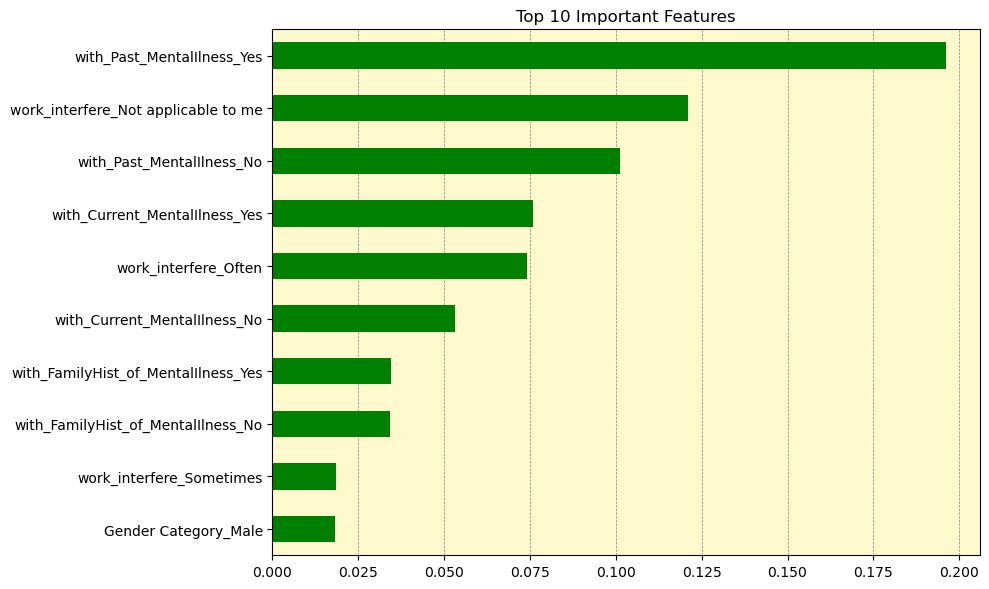

In [29]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_classification, y_classification, test_size=0.2, random_state=42, stratify=y_classification
)

X_train = X_train.astype(float)

# Apply SMOTE only to the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Grid search for best hyperparameters
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=42, class_weight='balanced')
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train_resampled, y_train_resampled)

# Best model
best_rf = grid_search.best_estimator_


# Predict and evaluate
y_pred = best_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred)

# ---- Confusion Matrix ----
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rf.classes_)
disp.plot(cmap='YlGnBu')  # using soft yellow colormap
plt.title('Confusion Matrix - Random Forest with SMOTE')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print(f' Accuracy of random forest classifier - SMOTE for predicting seeking treatment: {accuracy_rf:.2f}')
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot top 10 feature importances
importances = pd.Series(best_rf.feature_importances_, index=X_classification.columns)
top10 = importances.nlargest(10)

# Plot
ax = top10.plot(kind='barh', figsize=(10, 6), color='green', title='Top 10 Important Features')
ax.set_facecolor('lemonchiffon')  # Set axes background too
ax.invert_yaxis()  # higher values now appear on top

# Add dashed gridlines behind the bars
ax.set_axisbelow(True)
ax.grid(True, axis='x', color='gray', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

### <u>V. Conclusion</u><a id=40></a>

[⬆️back to Table of Contents](#0)

**Top Predictors of Treatment-Seeking Behavior:**

**1. Personal & Family Mental Health History**
Individuals with past/present mental health conditions or family history of mental illness show strongest treatment-seeking likelihood.

**2. Workplace Impact**
Those reporting their condition frequently interferes with work are significantly more likely to seek treatment.

**3.Key Demographic Factors**
- Gender: Males show distinct patterns (context-dependent)
- Employment Type: Self-employed individuals demonstrate unique behavioral trends